# Методичка

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [ ]:
X.shape, Y.shape

((1000, 5), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [ ]:
X_test.shape, Y_test.shape

((200, 5), (200,))

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [ ]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
4,Gaussian_Process,0.905
9,Neural_Net,0.905
8,Random_Forest,0.890
10,AdaBoost,0.890
11,Naive_Bayes,0.880
1,Linear_SVM,0.875
12,QDA,0.865
13,SGD,0.860
6,Decision_Tree,0.855
3,RBF_SVM,0.855


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
4,Gaussian_Process,0.905000
9,Neural_Net,0.905000
8,Random_Forest,0.890000
10,AdaBoost,0.890000
11,Naive_Bayes,0.880000
1,Linear_SVM,0.875000
12,QDA,0.865000
13,SGD,0.860000
6,Decision_Tree,0.855000
3,RBF_SVM,0.855000


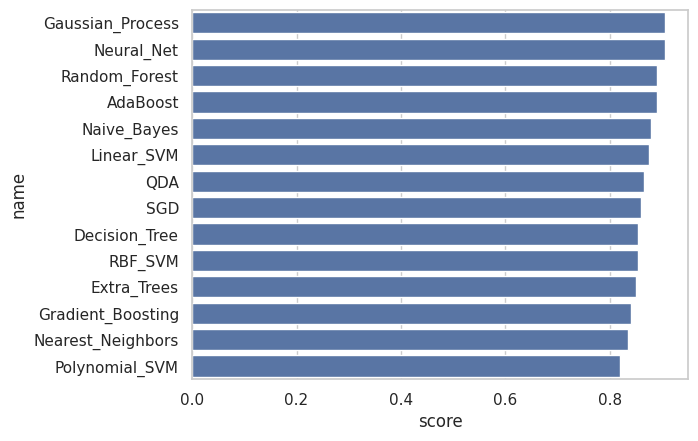

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

## Поиск по сетке

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# число verbose выбирайте сами
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

2.387342642087474

# Самостоятельная часть

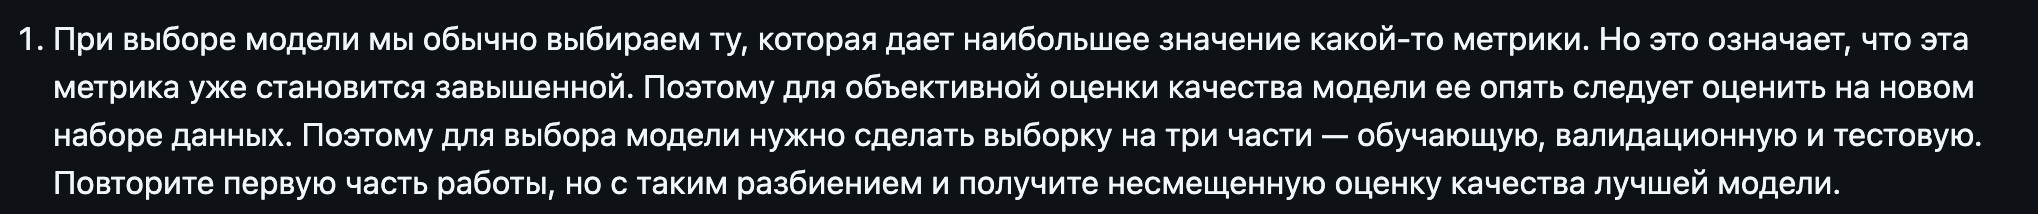

In [ ]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=123)

In [ ]:
from sklearn.model_selection import train_test_split
X_full_train, X_test, Y_full_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_full_train, Y_full_train, test_size=0.3, random_state=123)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((490, 5), (210, 5), (300, 5))

In [ ]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_valid, Y_valid)
    scores.append(score)

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
0,Nearest_Neighbors,0.990476
9,Neural_Net,0.990476
10,AdaBoost,0.990476
3,RBF_SVM,0.985714
4,Gaussian_Process,0.985714
7,Extra_Trees,0.980952
5,Gradient_Boosting,0.976190
8,Random_Forest,0.976190
6,Decision_Tree,0.971429
11,Naive_Bayes,0.952381


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.990476
9,Neural_Net,0.990476
10,AdaBoost,0.990476
3,RBF_SVM,0.985714
4,Gaussian_Process,0.985714
7,Extra_Trees,0.980952
5,Gradient_Boosting,0.976190
8,Random_Forest,0.976190
6,Decision_Tree,0.971429
11,Naive_Bayes,0.952381


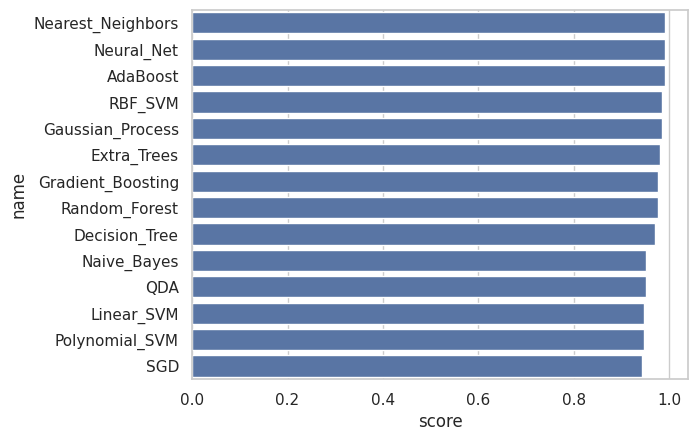

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [ ]:
best_classifier_index = np.argmax(scores)
best_classifier_name = names[best_classifier_index]
best_classifier = classifiers[best_classifier_index]

In [ ]:
best_classifier_score = best_classifier.score(X_test, Y_test)
best_classifier_score

0.98

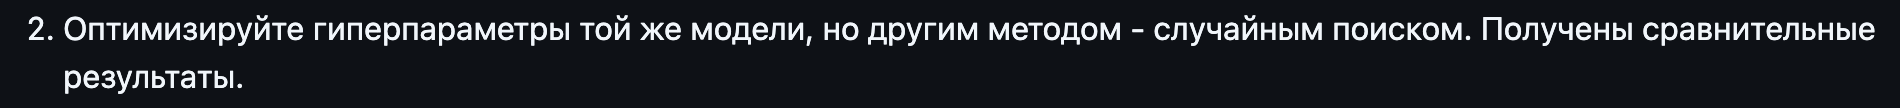

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
params = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search_model = RandomizedSearchCV(estimator=base_elastic_model,
                                   param_distributions=params,
                                   n_iter=20,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=2,
                                   random_state=123)

In [ ]:
random_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, 

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=20,
                   param_distributions={'alpha': [0.1, 1, 5, 10, 50, 100],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1]},
                   random_state=123, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_search_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [ ]:
y_pred = random_search_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

2.387342642087474

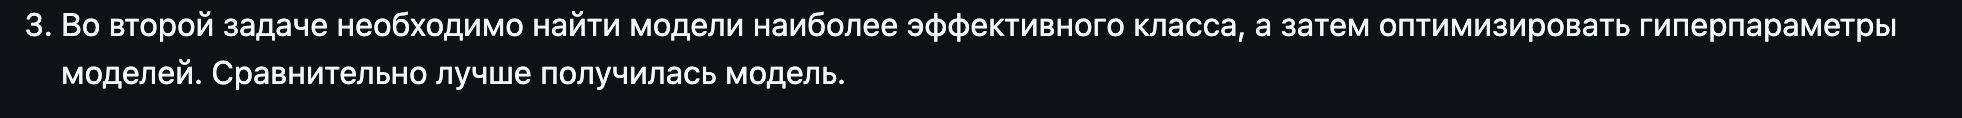

In [ ]:
df = pd.read_csv("Advertising.csv")

## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
names = [
    "LinearRegression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "DecisionTreeRegressor",
    "RandomForestRegressor",
]

regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ]

models_scores = {}

In [ ]:
scores = []
for name, reg in zip(names, regression_models):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    score = mean_squared_error(y_pred, y_test)
    scores.append(score)
    print(score)

2.2987166978863787
2.319021579428752
4.894721330866859
7.5362450466576165
1.2948333333333333
0.636828633333331


In [ ]:
best_reg_index = np.argmin(scores)
best_reg_name = names[best_reg_index]
best_reg_score = regression_models[best_reg_index]
best_reg_name, scores[best_reg_index]

('RandomForestRegressor', 0.636828633333331)

In [ ]:
model = RandomForestRegressor(random_state=123)

In [ ]:
params_grid = {
    'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800],
    'max_depth': [i for i in range(5,15)],
}

In [ ]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=params_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=5, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=11, n_estimators=10, random_state=123)

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

0.6869666666666662

In [ ]:
params = {
    'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800],
    'max_depth': [i for i in range(5,15)],
}

In [ ]:
random_search_model = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=2,
                                   random_state=123)

In [ ]:
random_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................max_depth=13, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=13, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=13, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=13, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=13, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=70; total time=   0.2s
[CV] END ......................max_depth=12, n_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
                   n_iter=20,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [10, 30, 50, 70, 100,
                                                         200, 400, 800]},
                   random_state=123, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_search_model.best_estimator_

RandomForestRegressor(max_depth=13, n_estimators=10, random_state=123)

In [ ]:
y_pred = random_search_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

0.7276633333333327